In [5]:
from PIL import Image
from utils import *

/Users/anand.thirwani/Desktop/Blogs/B6_SAM_CLIP/demo/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cpu


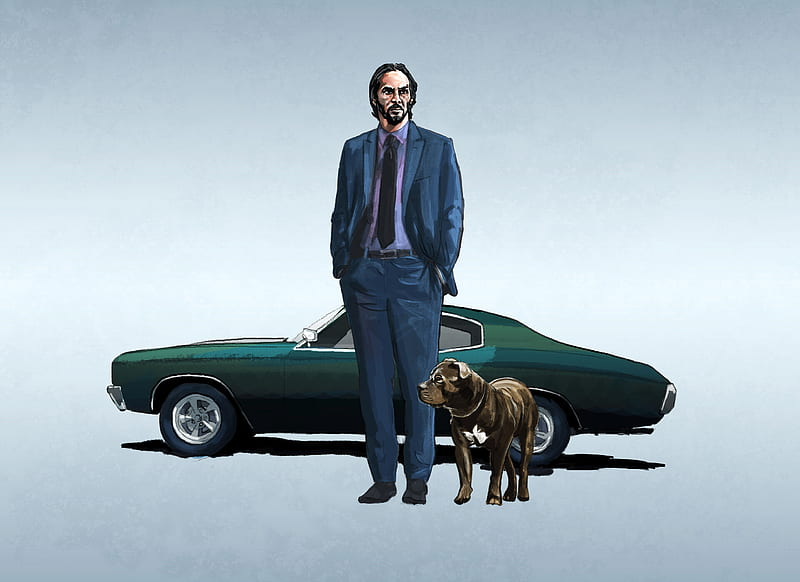

In [7]:
img_path = "toy_images/HD-wallpaper-john-wick-with-mustang.jpg"
raw_image = Image.open(img_path).convert("RGB")
raw_image

In [8]:
seg_db = create_segment_db(raw_image)

[2025-03-24T05:29:17Z WARN  lance::dataset::write::insert] No existing dataset at /Users/anand.thirwani/Desktop/Blogs/B6_SAM_CLIP/Image-Segmentation-Using-Text-Prompts/Segmentation_Table/Segmentation_Table.lance, it will be created


In [9]:
seg_db.to_pandas()

,embedding,content
0,"[0.533599, -0.029496986, -0.23715079, -0.75346...",/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
1,"[0.5589971, -0.11629685, -0.30725056, -0.74155...",/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
2,"[0.17448609, 0.025163328, -0.10264511, 0.06329...",/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
3,"[0.2367487, 0.19672653, -0.0015594882, -0.0360...",/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
4,"[-0.16165482, -0.2477998, -0.13553928, -0.0849...",/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
5,"[-0.0033998594, 0.05853565, -0.12335807, -0.18...",/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
6,"[-0.102847226, 0.2932267, -0.28735068, 0.29195...",/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
7,"[0.021458339, -0.27955607, -0.2585221, -0.0489...",/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
8,"[0.15320234, -0.15664758, -0.23554984, 0.16865...",/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
9,"[0.0985384, 0.2524633, -0.0036291764, 0.187762...",/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...


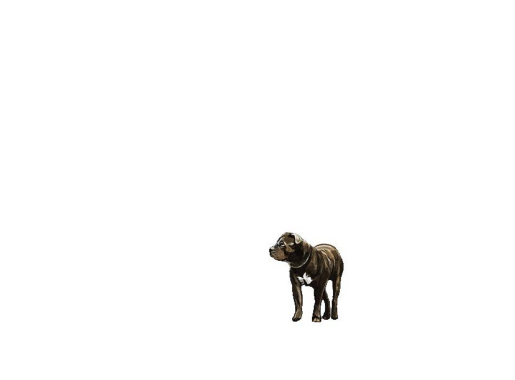

In [10]:
q = 'dog'
emb_q = get_embeddings_text(q, clip_model, clip_processor)
res = seg_db.search(emb_q).distance_type("l2").limit(1).to_pandas()
show_base64(res.iloc[0]['content'])

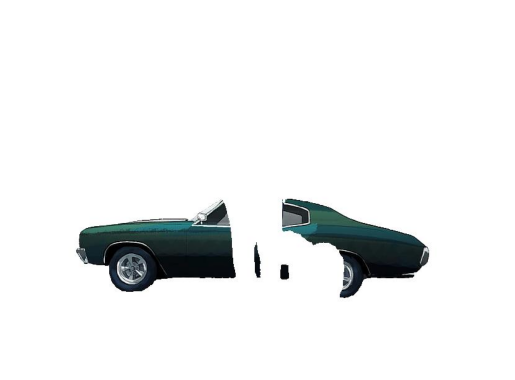

In [11]:
q = 'car'
emb_q = get_embeddings_text(q, clip_model, clip_processor)
res = seg_db.search(emb_q).distance_type("l2").limit(1).to_pandas()
show_base64(res.iloc[0]['content'])